In [2]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD

import PIL
import os, pathlib
import numpy as np

from application.utils import Utils

In [3]:
(trainX, trainY), (testX, testY) = mnist.load_data()

In [4]:
trainX.shape

(60000, 28, 28)

In [5]:
sample_image = trainX[0,:,:]
sample_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [6]:
print(f'Data shape: {sample_image.shape}')
image = PIL.Image.fromarray(sample_image)
image

Data shape: (28, 28)


In [7]:
trainY[0]

5

In [8]:
path_to_images = pathlib.Path(os.getcwd()).parent.resolve() / 'test/test_files'
path_to_images

WindowsPath('S:/PyProj/CNN_MNIST_PYQT/test/test_files')

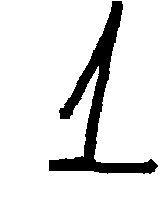

In [9]:
sample_image_own = PIL.Image.open(path_to_images / 'image_1.png')
sample_image_own

In [12]:
processed_own_image = Utils.get_formatted_image(sample_image_own, as_ndarray=False)
processed_own_image

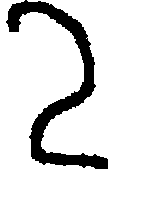

In [13]:
sample_image_own = PIL.Image.open(path_to_images / 'image_2.png')
sample_image_own

In [14]:
processed_own_image = Utils.get_formatted_image(sample_image_own, as_ndarray=False)
processed_own_image

In [10]:
# load train and test dataset
def load_dataset():
    # load dataset
    (trainX, trainY), (testX, testY) = mnist.load_data()
    print(trainX.shape)
    print(trainY.shape)
    print(testX.shape)
    print(testY.shape)
    # reshape dataset to have a single channel
    trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
    testX = testX.reshape((testX.shape[0], 28, 28, 1))
    # one hot encode target values
    trainY = to_categorical(trainY)
    testY = to_categorical(testY)
    return trainX, trainY, testX, testY

In [11]:
trainX, trainY, testX, testY = load_dataset()

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [12]:
sample_image = trainX[0,:,:][:,:,0]
print(f'Data shape: {sample_image.shape}')
image = PIL.Image.fromarray(sample_image)


Data shape: (28, 28)


In [13]:
trainY[0,:]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [14]:
# scale pixels
def prep_pixels(train, test):
    # convert from integers to floats
    train_norm = train.astype('float32')
    test_norm = test.astype('float32')
    # normalize to range 0-1
    train_norm = train_norm / 255.0
    test_norm = test_norm / 255.0
    # return normalized images
    return train_norm, test_norm

In [15]:
# define cnn model
def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(10, activation='softmax'))
    # compile model
    opt = SGD(learning_rate=0.01, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [16]:
# run the test harness for evaluating a model
def run_test_harness():
    # load dataset
    trainX, trainY, testX, testY = load_dataset()
    # prepare pixel data
    trainX, testX = prep_pixels(trainX, testX)
    # define model
    model = define_model()
    # fit model
    model.fit(trainX, trainY, epochs=10, batch_size=32, verbose=1)
    # save model
    model.save('digit_model.h5')
    _, acc = model.evaluate(testX, testY, verbose=0)
    print('> %.3f' % (acc * 100.0))

In [17]:
# entry point, run the test harness
run_test_harness()

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)
Epoch 1/10
 432/1875 [=====>........................] - ETA: 33s - loss: 0.2693 - accuracy: 0.9132

KeyboardInterrupt: 